In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
print("Setup complete")

Setup complete


In [2]:
#import dataset
companies = pd.read_csv("companies.csv")
companies

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 06:51,4/13/2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,8/12/2013,8/12/2013,2.0,5.0,NaN,9/6/2011 23:17,8/13/2013 00:39,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,5/1/2013,5/1/2013,1.0,14.0,NaN,8/24/2008 15:46,6/28/2013 20:55,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,1/1/2012,10/30/2013,3.0,44.0,NaN,8/24/2008 15:46,6/28/2013 20:52,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,8/24/2008 16:00,6/28/2013 20:56,34.052234,-118.243685,NaN


In [3]:
#first five info
companies.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 06:51,4/13/2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN


In [4]:
companies.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333330


In [5]:
companies.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [6]:
# Delete 'region','city','state_code' as they provide too much of granularity.
companies = companies.drop(['region','city','state_code'], axis=1)
companies.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 06:51,4/13/2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN


In [7]:
#Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at' as they are redundant.
companies = companies.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1)
companies.head()

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,10/17/2005,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2/1/2003,9/23/2011,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,7/26/2008,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,7/26/2008,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
#'invested_companies' as they are irrelevant features.
companies=companies.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url','invested_companies','logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink'], axis=1)
companies.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2003,9/23/2011,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#find duplicate values if any
# companies.duplicated().sum()
companies.duplicated().any()

True

In [10]:
companies.duplicated().sum()

87089

In [11]:
# delete all the duplicate values
companies.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
# check if any left
companies.duplicated().any()

False

In [13]:
#finding null values
companies.isnull().sum().sum()

1167810

In [14]:
# percentage of missing null values
percent=companies.isnull().sum()/(len(companies))*100
percent

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64

In [20]:
companies.loc[:,['first_investment_at','last_investment_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at','investment_rounds','ROI','relationships']].isnull().sum()

first_investment_at    107217
last_investment_at     107217
first_funding_at        77992
last_funding_at         77992
first_milestone_at      53353
last_milestone_at       53353
investment_rounds      107213
ROI                    108738
relationships           34403
dtype: int64

In [21]:
#dropping the columns 
companies = companies.drop(['first_investment_at','last_investment_at','first_milestone_at','last_milestone_at','first_funding_at','last_funding_at','investment_rounds','ROI'], axis=1)
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [22]:
# check if any null values are present
companies.loc[:,['status','country_code','category_code','founded_at']].isnull().any()

status           False
country_code      True
category_code     True
founded_at        True
dtype: bool

In [23]:
companies.loc[:,['status','country_code','category_code','founded_at']].isnull()

,status,country_code,category_code,founded_at
0,False,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
196548,False,False,False,False
196549,False,False,False,False
196550,False,False,False,False
196551,False,False,False,False


In [24]:
companies.loc[:,['status','country_code','category_code','founded_at']].isnull().sum()

status               0
country_code     24870
category_code    12230
founded_at       26913
dtype: int64

In [25]:
companies.dropna(subset=['status','country_code','category_code','founded_at'],axis=0,inplace=True)
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,10/1/2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [26]:
# check if there are any null values left
companies.loc[:,['status','country_code','category_code','founded_at']].isnull().any()

status           False
country_code     False
category_code    False
founded_at       False
dtype: bool

In [27]:
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,10/1/2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funding_total_usd'>

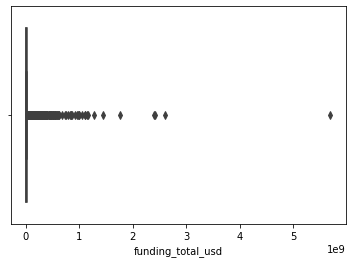

In [28]:
# Detecting outliers in 'funding_total_usd' using IQR method
sns.boxplot(companies['funding_total_usd'])

In [29]:
# Using IQR method
min_funding_total = companies['funding_total_usd'].quantile(0.25)
max_funding_total = companies['funding_total_usd'].quantile(0.75)
min_funding_total, max_funding_total

(511038.0, 12000000.0)

In [30]:
IQR_usd = max_funding_total - min_funding_total
IQR_usd

11488962.0

In [31]:
companies.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22889.000000,2.046700e+04,35244.000000,48295.000000,61211.000000,61211.000000
mean,1.805758,1.582132e+07,1.415929,4.443607,37.294084,-50.715469
std,1.310805,6.990693e+07,0.738596,13.267906,15.813059,70.778579
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.110380e+05,1.000000,1.000000,34.052234,-112.033479
50%,1.000000,2.725875e+06,1.000000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.000000,4.000000,45.420675,1.750318
max,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


In [32]:
#  for finding 'funding_total_usd' column
lower_limit_usd = min_funding_total - 1.5 * IQR_usd
upper_limit_usd = max_funding_total + 1.5 * IQR_usd
lower_limit_usd,upper_limit_usd

(-16722405.0, 29233443.0)

In [33]:
# Detecting outliers in 'funding_total_usd' using IQR method
companies[companies['funding_total_usd'] < lower_limit_usd]
companies[companies['funding_total_usd'] > upper_limit_usd]

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
19,health,operating,10/1/2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415
24,analytics,operating,1/1/2006,NaN,USA,3.0,33000000.0,3.0,19.0,37.774929,-122.419415
66,mobile,acquired,1/1/2005,NaN,USA,7.0,121500000.0,3.0,45.0,42.360082,-71.058880
80,games_video,operating,4/1/2003,NaN,USA,3.0,95097200.0,3.0,28.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...
196290,mobile,operating,1/1/2001,NaN,DEU,5.0,40673570.0,1.0,11.0,48.027728,11.586918
196298,hardware,operating,1/1/1995,NaN,USA,3.0,146000000.0,3.0,23.0,37.485215,-122.236355
196415,security,operating,1/1/1997,NaN,USA,1.0,108000000.0,3.0,17.0,39.920541,-105.086650
196496,games_video,acquired,1/1/2004,NaN,CHN,4.0,286500000.0,2.0,3.0,31.230390,121.473702


In [34]:
filter1 = companies['funding_total_usd'] < upper_limit_usd
filter2 = companies['funding_total_usd']  > lower_limit_usd
companies.drop(companies[filter1 & filter2].index, inplace = True)

In [35]:
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,1/1/2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,4/30/2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373
196545,software,operating,1/1/2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funding_rounds'>

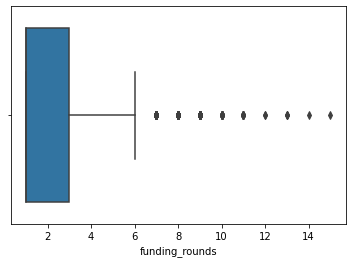

In [36]:
# # Detecting outliers in 'funding_rounds' using IQR method
sns.boxplot(companies['funding_rounds'])

In [37]:
# Using IQR method
min_funding_rounds = companies['funding_rounds'].quantile(0.25)
max_funding_rounds = companies['funding_rounds'].quantile(0.75)
min_funding_rounds, max_funding_rounds

(1.0, 3.0)

In [38]:
IQR_rounds = max_funding_rounds-min_funding_rounds
IQR_rounds

2.0

In [39]:
companies.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,4983.000000,2.561000e+03,24412.000000,32874.000000,43760.000000,43760.000000
mean,2.363837,9.155242e+07,1.322628,4.169161,36.776293,-44.865914
std,1.928331,1.794418e+08,0.673016,13.008781,16.734618,72.991850
min,1.000000,2.927320e+07,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,3.898253e+07,1.000000,1.000000,33.748995,-104.877173
50%,1.000000,5.361510e+07,1.000000,2.000000,39.739236,-74.005973
75%,3.000000,8.770000e+07,1.000000,4.000000,45.501689,4.895168
max,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


In [40]:
#  for finding 'funding_rounds' column
lower_limit_rounds = min_funding_rounds - 1.5 * IQR_rounds
upper_limit_rounds = max_funding_rounds + 1.5 * IQR_rounds
lower_limit_rounds,upper_limit_rounds

(-2.0, 6.0)

In [41]:
# Detecting outliers in 'funding_rounds' using IQR method
companies[companies['funding_rounds'] < lower_limit_rounds]
companies[companies['funding_rounds'] > upper_limit_rounds]

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
66,mobile,acquired,1/1/2005,NaN,USA,7.0,121500000.0,3.0,45.0,42.360082,-71.058880
425,transportation,operating,1/1/2005,NaN,USA,7.0,351600000.0,3.0,29.0,34.019454,-118.491191
620,advertising,operating,5/1/2007,NaN,USA,7.0,60000000.0,5.0,29.0,34.052234,-118.243685
779,advertising,ipo,1/1/2005,NaN,USA,8.0,116400000.0,3.0,24.0,40.712775,-74.005973
1308,advertising,ipo,1/1/2004,NaN,USA,8.0,72900000.0,4.0,28.0,37.485215,-122.236355
...,...,...,...,...,...,...,...,...,...,...,...
195288,software,acquired,3/1/2006,NaN,USA,8.0,41752000.0,5.0,21.0,37.774929,-122.419415
195481,software,operating,10/1/2009,NaN,USA,7.0,35950000.0,3.0,27.0,37.774929,-122.419415
195717,analytics,operating,1/1/2005,NaN,USA,10.0,81902652.0,3.0,19.0,47.610150,-122.201516
196174,semiconductor,closed,1/1/2000,1/1/2011,USA,7.0,74000000.0,NaN,3.0,32.715738,-117.161084


In [42]:
# drop the outliers
filter3 = companies['funding_rounds'] < upper_limit_rounds
filter4 = companies['funding_rounds'] > lower_limit_rounds
companies.drop(companies[filter3 & filter4].index, inplace = True)

In [43]:
# check datatypes
companies.dtypes

category_code         object
status                object
founded_at            object
closed_at             object
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
dtype: object

In [50]:
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,1/1/2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
22,software,operating,1/25/2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,4/30/2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373
196545,software,operating,1/1/2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091


In [51]:
# convert into datetime datatype and extract year
# 'founded_at'
companies['founded_at'] = pd.to_datetime(companies['founded_at'], format="%m/%d/%Y" ).dt.year
# 'closed_at'
companies['closed_at'] = pd.to_datetime(companies['closed_at'], format="%m/%d/%Y" ).dt.year
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
22,software,operating,2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373
196545,software,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091


In [52]:
# unique categories in 'category_code' columns
unique_category = pd.unique(companies['category_code']) 
len(unique_category)
unique_category, len(unique_category)

(array(['advertising', 'cleantech', 'games_video', 'software',
        'consulting', 'finance', 'web', 'mobile', 'network_hosting',
        'other', 'ecommerce', 'public_relations', 'hardware', 'enterprise',
        'search', 'health', 'semiconductor', 'legal', 'transportation',
        'education', 'security', 'biotech', 'news', 'analytics', 'sports',
        'automotive', 'social', 'local', 'messaging', 'travel', 'music',
        'design', 'medical', 'nonprofit', 'fashion', 'hospitality',
        'manufacturing', 'pets', 'nanotech', 'government', 'photo_video',
        'real_estate'], dtype=object),
 42)

In [53]:
# finding the top 15 categories in 'category_code'
companies.category_code.value_counts().sort_values(ascending=False).head(15)

software            7647
web                 5719
other               4309
ecommerce           3689
advertising         2744
consulting          2563
mobile              2203
games_video         1889
enterprise          1415
public_relations    1306
network_hosting      976
hardware             817
education            806
search               752
biotech              588
Name: category_code, dtype: int64

In [54]:
def get_category(actual_category):
    
    category_list = ['software','web','ecommerce','advertising','consulting','mobile','games_video','enterprise',
                 'public_relations','network_hosting','hardware','education','search','biotech']
    
    if actual_category in category_list:
        return actual_category
    else:
        return 'other'

In [55]:
companies['category_code'] = companies.apply(lambda x: get_category(x['category_code']),axis =1)
companies['category_code']

5         advertising
6               other
12        advertising
15        games_video
22           software
             ...     
196543          other
196545       software
196548      ecommerce
196550     consulting
196551         search
Name: category_code, Length: 41082, dtype: object

In [56]:
companies.category_code.value_counts().sort_values(ascending=False)

other               7968
software            7647
web                 5719
ecommerce           3689
advertising         2744
consulting          2563
mobile              2203
games_video         1889
enterprise          1415
public_relations    1306
network_hosting      976
hardware             817
education            806
search               752
biotech              588
Name: category_code, dtype: int64

In [57]:
#One-hot encoding to category_code
category = companies[["category_code"]]
category = pd.get_dummies(category, drop_first= True)
category.head()

,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,1,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
# concat category with company dataset
merged = pd.concat([companies,category],axis='columns')
merged

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,...,0,0,0,0,0,0,0,0,0,0
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,...,0,0,0,0,0,1,0,0,0,0
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,...,0,0,0,0,0,0,0,0,0,0
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,...,0,1,0,0,0,0,0,0,0,0
22,software,operating,2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,other,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,...,0,0,0,0,0,1,0,0,0,0
196545,software,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,...,0,0,0,0,0,0,0,0,1,0
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,...,0,0,0,0,0,0,0,0,0,0
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# drop origianl category_code
final = merged.drop(['category_code'],axis='columns')
final

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,0,0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0,1,0,0,0,0,0,0,0,0
22,operating,2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373,...,0,0,0,0,0,1,0,0,0,0
196545,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219,...,0,0,0,0,0,0,0,0,1,0
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,0,0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# unique values in 'country_code' columns
print(len(companies['country_code'].unique()))

161


In [61]:
# finding the top 10 categories in 'country_code'
companies.country_code.value_counts().sort_values(ascending=False).head(10)

USA    21574
GBR     3745
IND     2609
CAN     1951
DEU      883
AUS      858
FRA      758
ESP      610
NLD      518
ISR      403
Name: country_code, dtype: int64

In [62]:
def get_country(actual_country):
    
    country_list = ['USA','GBR','IND','CAN','DEU','AUS','FRA','ESP','NLD','ISR','IRL','BRA']

    if actual_country in country_list:
        return actual_country
    else:
        return 'other'

In [63]:
companies['country_code'] = companies.apply(lambda x: get_country(x['country_code']),axis =1)
companies['country_code']

5         other
6           IND
12          USA
15          USA
22          AUS
          ...  
196543      USA
196545      USA
196548      USA
196550      USA
196551      USA
Name: country_code, Length: 41082, dtype: object

In [64]:
#One-hot encoding to country_code
country = companies[["country_code"]]
country = pd.get_dummies(country, drop_first= True)
country.head()

,country_code_BRA,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,1,0
15,0,0,0,0,0,0,0,0,0,0,1,0
22,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# concat country with company dataset
merged = pd.concat([companies,country],axis='columns').head()
merged

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,advertising,operating,2007,NaN,other,NaN,NaN,NaN,2.0,30.427755,...,0,0,0,0,0,0,0,0,0,1
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,...,0,0,0,0,1,0,0,0,0,0
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,...,0,0,0,0,0,0,0,0,1,0
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,...,0,0,0,0,0,0,0,0,1,0
22,software,operating,2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# drop original country_code
final = merged.drop(['country_code'],axis='columns').head()
final

,category_code,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,advertising,operating,2007,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,1
6,other,operating,2008,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,1,0,0,0,0,0
12,advertising,operating,2008,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,1,0
15,games_video,operating,2008,NaN,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0,0,0,0,0,0,0,0,1,0
22,software,operating,2011,NaN,NaN,NaN,1.0,2.0,49.050438,-122.304470,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# create new feature
def get_isClosed(status):
    if status == 'operating':
        return 1
    elif status == 'ipo':
        return 1
    else:
        return 0
companies['isClosed'] = companies.apply(lambda x: get_isClosed(x['status']),axis =1)
companies['isClosed']

5         1
6         1
12        1
15        1
22        1
         ..
196543    1
196545    1
196548    1
196550    1
196551    1
Name: isClosed, Length: 41082, dtype: int64

In [68]:
# check if there are any unique values
unique_isClosed= pd.unique(companies['isClosed'])
unique_isClosed

array([1, 0], dtype=int64)

In [69]:
close_detail = companies['closed_at']
status = companies['status']

closedAt = []
zip_object = zip(status,close_detail)

for status,close_detail in zip_object:
    if (status == 'acquired'):
        close = close_detail
        closedAt.append(close)
    elif (status == 'closed'):
        close = close_detail
        closedAt.append(close)
    else:
        close = '2021'
        closedAt.append(close)
    
companies['closed_at'] = pd.DataFrame(closedAt)
companies['closed_at']

5         2021
6         2021
12        2021
15        2021
22        2021
          ... 
196543     NaN
196545     NaN
196548     NaN
196550     NaN
196551     NaN
Name: closed_at, Length: 41082, dtype: object

In [70]:
companies.dropna(subset=['closed_at'],axis=0,inplace=True)
companies

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,1
6,other,operating,2008,2021,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,2021,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1
15,games_video,operating,2008,2021,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1
22,software,operating,2011,2021,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41060,software,operating,2012,2021,other,NaN,NaN,1.0,3.0,22.396428,114.109497,1
41067,other,operating,1978,2021,GBR,NaN,NaN,NaN,NaN,52.486243,-1.890401,1
41071,games_video,operating,2012,2021,other,NaN,NaN,1.0,1.0,35.689487,139.691706,1
41077,web,operating,2012,2021,other,NaN,NaN,1.0,2.0,52.229676,21.012229,1


In [71]:
unique_closed_at = pd.unique(companies['closed_at'])
unique_closed_at

array(['2021', 2010.0, 2009.0, 2012.0, 2011.0, 2008.0, 2013.0, 1963.0,
       2007.0, 2006.0], dtype=object)

In [72]:
closed_at = companies['closed_at']
founded_at = companies['founded_at']

active_days = []
transform_zip=zip(closed_at,founded_at)

for closed_at,founded_at in transform_zip:
    if float(closed_at) > float(founded_at):
        days=float(closed_at) - float(founded_at)
        days = 365 * days
        active_days.append(days)
    else:
        index_name = companies[(companies['founded_at'] == 'founded_at') & (companies['closed_at'] == 'closed_at')].index
        companies.drop(index_name, inplace = True)
        
companies['active_days'] = pd.DataFrame(active_days)
companies['active_days']

5        4380.0
6        3285.0
12       5110.0
15       4745.0
22       5840.0
          ...  
41060       NaN
41067       NaN
41071       NaN
41077       NaN
41078       NaN
Name: active_days, Length: 11175, dtype: float64

In [73]:
# delete the 'closed_at' column
companies=companies.drop(['closed_at'],axis=1)
companies.head()

,category_code,status,founded_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
5,advertising,operating,2007,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,1,4380.0
6,other,operating,2008,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1,3285.0
12,advertising,operating,2008,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1,5110.0
15,games_video,operating,2008,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1,4745.0
22,software,operating,2011,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470,1,5840.0


In [74]:
#target variable
unique_status = pd.unique(companies['status'])
unique_status

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [75]:
def get_status(status):
    if status == 'operating':
        return 1
    elif status == 'acquired':
        return 2
    elif status == 'closed':
        return 3
    else:
        return 4

In [76]:
companies['status'] = companies.apply(lambda x: get_status(x['status']),axis =1)
companies['status']

5        1
6        1
12       1
15       1
22       1
        ..
41060    1
41067    1
41071    1
41077    1
41078    1
Name: status, Length: 11175, dtype: int64

In [77]:
companies.status.value_counts().sort_values(ascending=False)

1    10707
2      354
3       63
4       51
Name: status, dtype: int64

In [78]:
companies

,category_code,status,founded_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
5,advertising,1,2007,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,1,4380.0
6,other,1,2008,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1,3285.0
12,advertising,1,2008,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1,5110.0
15,games_video,1,2008,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1,4745.0
22,software,1,2011,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470,1,5840.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41060,software,1,2012,other,NaN,NaN,1.0,3.0,22.396428,114.109497,1,NaN
41067,other,1,1978,GBR,NaN,NaN,NaN,NaN,52.486243,-1.890401,1,NaN
41071,games_video,1,2012,other,NaN,NaN,1.0,1.0,35.689487,139.691706,1,NaN
41077,web,1,2012,other,NaN,NaN,1.0,2.0,52.229676,21.012229,1,NaN


In [82]:
funding_rounds  = companies['funding_rounds'].mean().round()
funding_total_usd  = companies['funding_total_usd'].mean().round()
milestones  = companies['milestones'].mean().round()

companies['funding_rounds'] = companies['funding_rounds'].fillna(funding_rounds)
companies['funding_total_usd'] = companies['funding_total_usd'].fillna(funding_total_usd)
companies['milestones'] = companies['milestones'].fillna(milestones)

AttributeError: 'float' object has no attribute 'round'

In [83]:
companies.dropna(inplace = True)

In [84]:
companies.reset_index()

,index,category_code,status,founded_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
0,66,mobile,2,2005,USA,7.0,1.215000e+08,3.0,45.0,42.360082,-71.058880,0,4745.0
1,425,other,1,2005,USA,7.0,3.516000e+08,3.0,29.0,34.019454,-118.491191,1,12775.0
2,620,advertising,1,2007,USA,7.0,6.000000e+07,5.0,29.0,34.052234,-118.243685,1,11315.0
3,779,advertising,4,2005,USA,8.0,1.164000e+08,3.0,24.0,40.712775,-74.005973,1,7300.0
4,1117,web,1,2006,USA,6.0,6.765000e+07,2.0,31.0,37.485215,-122.236355,1,4745.0
5,1292,biotech,1,2006,USA,6.0,1.605499e+08,3.0,41.0,37.386052,-122.083851,1,4745.0
6,1308,advertising,4,2004,USA,8.0,7.290000e+07,4.0,28.0,37.485215,-122.236355,1,9125.0
7,1426,education,4,2005,USA,10.0,2.523037e+08,3.0,42.0,37.354108,-121.955236,1,5840.0
8,1427,other,1,2005,USA,6.0,7.387000e+07,1.0,17.0,42.360082,-71.058880,1,6570.0
9,1630,web,2,2007,USA,6.0,1.252500e+08,5.0,30.0,40.712775,-74.005973,0,5110.0


In [85]:
# checking null values again
companies.isnull().sum()

category_code        0
status               0
founded_at           0
country_code         0
funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
isClosed             0
active_days          0
dtype: int64

In [86]:
companies.to_csv('CleanedData.csv')

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime
print("Setup complete")

Setup complete


In [2]:
#import dataset
data = pd.read_csv("CleanedData.csv")
data

,Unnamed: 0,category_code,status,founded_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
0,66,mobile,2,2005,USA,7.0,1.215000e+08,3.0,45.0,42.360082,-71.058880,0,4745.0
1,425,other,1,2005,USA,7.0,3.516000e+08,3.0,29.0,34.019454,-118.491191,1,12775.0
2,620,advertising,1,2007,USA,7.0,6.000000e+07,5.0,29.0,34.052234,-118.243685,1,11315.0
3,779,advertising,4,2005,USA,8.0,1.164000e+08,3.0,24.0,40.712775,-74.005973,1,7300.0
4,1117,web,1,2006,USA,6.0,6.765000e+07,2.0,31.0,37.485215,-122.236355,1,4745.0
5,1292,biotech,1,2006,USA,6.0,1.605499e+08,3.0,41.0,37.386052,-122.083851,1,4745.0
6,1308,advertising,4,2004,USA,8.0,7.290000e+07,4.0,28.0,37.485215,-122.236355,1,9125.0
7,1426,education,4,2005,USA,10.0,2.523037e+08,3.0,42.0,37.354108,-121.955236,1,5840.0
8,1427,other,1,2005,USA,6.0,7.387000e+07,1.0,17.0,42.360082,-71.058880,1,6570.0
9,1630,web,2,2007,USA,6.0,1.252500e+08,5.0,30.0,40.712775,-74.005973,0,5110.0


In [3]:
#first five info
data.head()

,Unnamed: 0,category_code,status,founded_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
0,66,mobile,2,2005,USA,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,4745.0
1,425,other,1,2005,USA,7.0,351600000.0,3.0,29.0,34.019454,-118.491191,1,12775.0
2,620,advertising,1,2007,USA,7.0,60000000.0,5.0,29.0,34.052234,-118.243685,1,11315.0
3,779,advertising,4,2005,USA,8.0,116400000.0,3.0,24.0,40.712775,-74.005973,1,7300.0
4,1117,web,1,2006,USA,6.0,67650000.0,2.0,31.0,37.485215,-122.236355,1,4745.0


In [4]:
data.describe()

,Unnamed: 0,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days
count,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3003.787879,1.969697,2004.878788,7.060606,2.121333e+08,3.545455,31.242424,39.043821,-107.019241,0.787879,6216.060606
std,1773.515960,1.262063,2.701360,1.456438,2.972587e+08,1.641092,28.947183,2.956086,21.631100,0.415149,2639.136861
min,66.000000,1.000000,1998.000000,6.000000,2.991500e+07,1.000000,6.000000,34.019454,-122.419415,0.000000,3285.000000
25%,1427.000000,1.000000,2004.000000,6.000000,6.000000e+07,2.000000,18.000000,37.485215,-122.325525,1.000000,4015.000000
50%,3104.000000,1.000000,2005.000000,7.000000,8.996934e+07,3.000000,24.000000,37.774929,-121.955236,1.000000,5475.000000
75%,4133.000000,3.000000,2006.000000,7.000000,2.114030e+08,4.000000,31.000000,40.712775,-86.158068,1.000000,7665.000000
max,7199.000000,4.000000,2011.000000,13.000000,1.160167e+09,8.000000,162.000000,47.751074,-71.058880,1.000000,13505.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'category_code', 'status', 'founded_at', 'country_code',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')

In [6]:
data.shape

(33, 13)

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

Unnamed: 0             int64
category_code         object
status                 int64
founded_at             int64
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
isClosed               int64
active_days          float64
dtype: object

In [9]:
# Get numerical values and categorical variables
categorical_variable = [feature for feature in data.columns if data[feature].dtypes == 'O']
print("Number of categorical Variables:",len(categorical_variable))
data[categorical_variable].head()

Number of categorical Variables: 2


,category_code,country_code
0,mobile,USA
1,other,USA
2,advertising,USA
3,advertising,USA
4,web,USA


In [10]:
correlation = data.corr()

<AxesSubplot:>

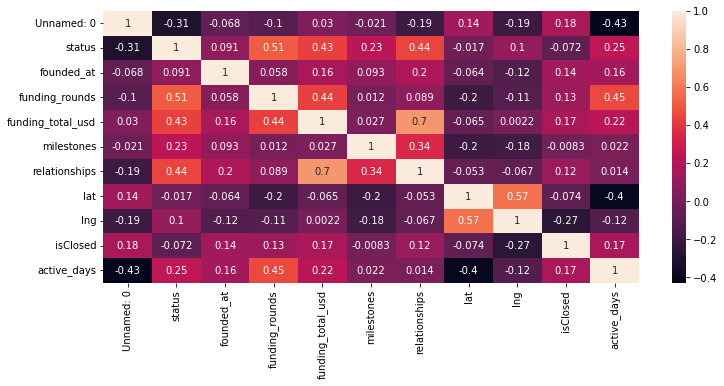

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:ylabel='status'>

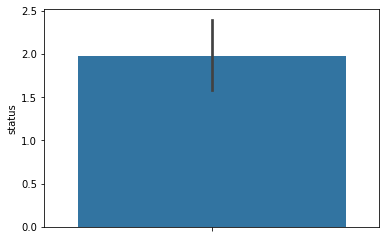

In [12]:
# Univariate data using bar plot
sns.barplot(y=data['status'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category_code', ylabel='count'>

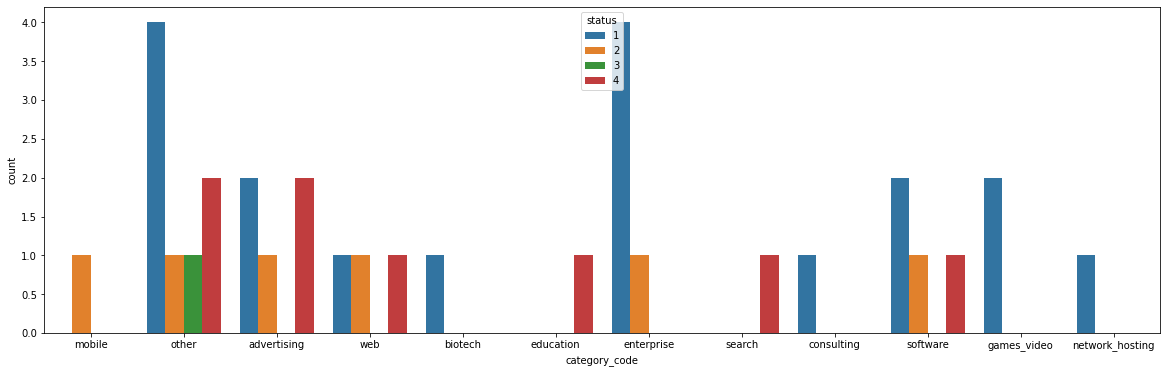

In [13]:
# univariate data using countplot
plt.figure(figsize=(20,6))
sns.countplot(data.category_code, hue=data.status)

<AxesSubplot:xlabel='status', ylabel='Count'>

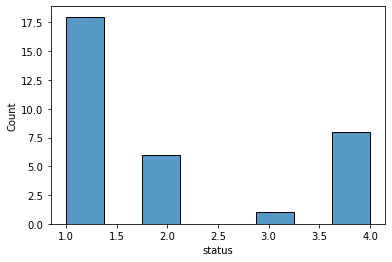

In [14]:
# univariate data using histogram plot
sns.histplot(data['status'], kde=False,bins=8)

<AxesSubplot:xlabel='status', ylabel='active_days'>

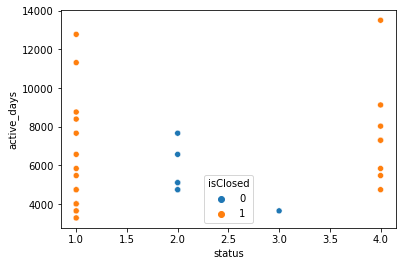

In [15]:
# bivariate data using scatterplot
sns.scatterplot(x=data['status'],y=data['active_days'],hue=data['isClosed'])

In [2]:
# bivariate data using pairplot
sns.pairplot(data,hue="category.sns")

NameError: name 'sns' is not defined

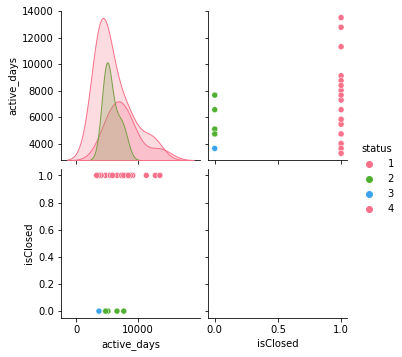

In [18]:
# bivariate data using pairplots
sns.pairplot(data,vars=["active_days","isClosed"],hue="status", palette="husl")

In [19]:
#scaling for 'active_days'
scaler = MinMaxScaler()
data[["Scaledactivedays"]] = scaler.fit_transform(data[["active_days"]])
data[["Scaledactivedays"]]

,Scaledactivedays
0,0.142857
1,0.928571
2,0.785714
3,0.392857
4,0.142857
5,0.142857
6,0.571429
7,0.250000
8,0.321429
9,0.178571


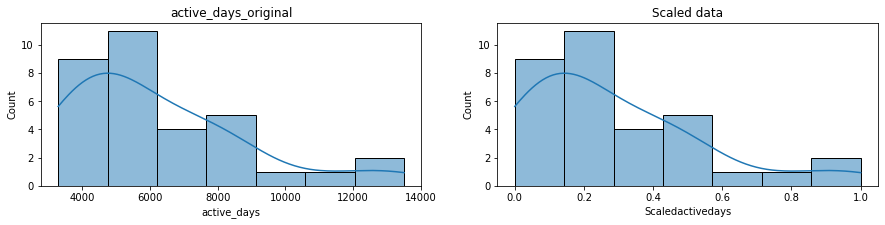

In [20]:
# Scaling for 'active_days'
activedays=data['active_days']
scaledactivedays=data["Scaledactivedays"]

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(activedays, ax=ax[0], kde=True, legend=False)
ax[0].set_title("active_days_original")
sns.histplot(scaledactivedays, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [21]:
# normalization technique
df_z_scaled = data['active_days']
  
# apply normalization techniques
for column in df_z_scaled:
    df_z_scaled = (df_z_scaled -
                           df_z_scaled.mean()) / df_z_scaled.std()    
  
# view normalized data   
display(df_z_scaled)

0    -0.557402
1     2.485259
2     1.932048
3     0.410717
4    -0.557402
5    -0.557402
6     1.102231
7    -0.142494
8     0.134112
9    -0.419099
10    0.549020
11    0.410717
12    0.687323
13   -0.834008
14   -0.972311
15   -0.557402
16   -0.972311
17   -0.419099
18    0.134112
19    0.549020
20    0.963929
21    2.761865
22   -0.280797
23   -0.557402
24   -0.834008
25    0.825626
26   -0.280797
27   -0.834008
28   -1.110613
29   -0.142494
30   -0.834008
31   -0.972311
32   -1.110613
Name: active_days, dtype: float64

<AxesSubplot:ylabel='Frequency'>

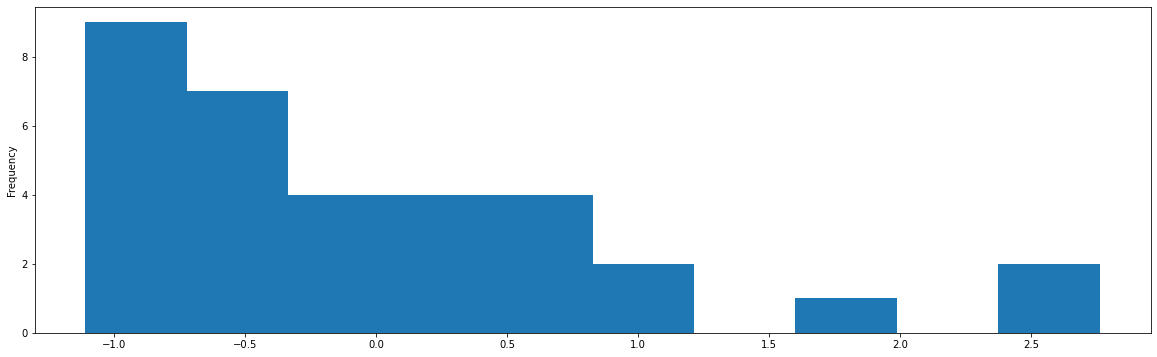

In [22]:
plt.figure(figsize=(20,6))
df_z_scaled.plot(kind='hist')